<a href="https://colab.research.google.com/github/SrujanKankatala/signal-and-image-analysis/blob/main/image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1080, 1920)


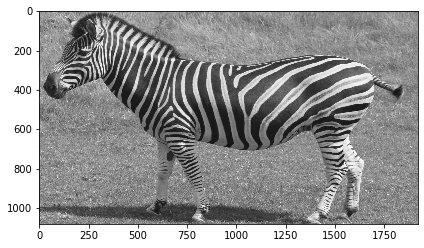

In [ ]:
# images using skikit-image 
import os 
# importing io from skimage 
import skimage 
from skimage import io 
zebra = io.imread('zebra.png') 
# way to show the input image 
print(zebra.shape)  # shape of image
io.imshow(zebra) 
io.show() 

-Above image is f

PART-1

In [ ]:
from skimage.io import imread
import numpy as np
arr = imread("zebra.png") #reading image as array
arr

array([[150, 142, 135, ..., 133, 131, 131],
       [151, 143, 135, ..., 134, 132, 130],
       [154, 146, 139, ..., 135, 133, 130],
       ...,
       [145, 150, 149, ..., 130, 130, 140],
       [140, 145, 147, ..., 145, 144, 155],
       [135, 141, 146, ..., 177, 166, 156]], dtype=uint8)

(540, 960)
(1080, 1920)


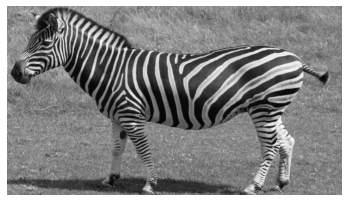

In [ ]:
import matplotlib.pyplot as plt   
import cv2
arr_1=[]
a=0
for i in arr:       
  if a%2==0:               #eliminating alternate rows
    arr_1.append([])
    b=0
    for j in i:
       if b%2 ==0:         #eliminating alternate columns
         arr_1[-1].append(j)
       b+=1
  a+=1
arr_1=np.array(arr_1)      #converting rows to numpy array
print(arr_1.shape)        
arr_2=arr_1.astype(np.uint8)
arr_2 = cv2.resize(arr_2,None,fx=2,fy=2, interpolation = cv2.INTER_LINEAR)  
plt.imshow(arr_2,cmap='gray')
plt.axis('off')
print(arr_2.shape)

-Above image is gu which is obtained by unsampling g

PART-2

Here, we are increasing the size of image by adding 2 rows and 2 columns,  
To compensate reduced shape due to averaging.


In [ ]:
arr_3=[] 
for i in arr:
  arr_3.append([])
  for j in i:
    arr_3[-1].append(int(j))

arr_3.append([0 for _ in range(1920)])
arr_3.insert(0,[0 for _ in range(1920)])
for i in arr_3:
  i.append(0)
  i.insert(0,0)
arr_3=np.array(arr_3)
arr_3.shape

(1082, 1922)

In [ ]:
k=0
def avg(qw):  #defining average filter
  li=[]
  k=np.array(qw).shape
  for i in qw:   #applying filter for rows
    li.append([])
    pre=i[0]
    for j in range(1,k[1]-1):
      cur=i[j]
      nxt=i[j+1]
      avg=(cur+nxt+pre)/3
      li[-1].append(avg)
      pre=cur
  asi=np.transpose(np.array(li)) #Taking Transpose
  li1=[]
  for i in asi:   #applying filter for columns
    li1.append([])
    pre=i[0]
    for j in range(1,k[0]-1):
      cur=i[j]
      nxt=i[j+1]
      avg=(cur+nxt+pre)/3
      li1[-1].append(avg)
      pre=cur
  asi=np.transpose(np.array(li1)) #Taking Transpose to get original one
  return asi
arr_3=avg(arr_3)    
arr_4=[]
k=0
for i in arr_3 :
  if k%2==0:
    arr_4.append([])
    l=0
    for j in i:
       if l%2 ==0:
         arr_4[-1].append(j)
       l+=1
  k+=1
arr_4=np.array(arr_4)
arr_4=arr_4.astype(np.uint8)
arr_4 = cv2.resize(arr_4,None,fx=2,fy=2, interpolation = cv2.INTER_LINEAR) #Interpolation to get required shape 

(-0.5, 1917.5, 1077.5, -0.5)

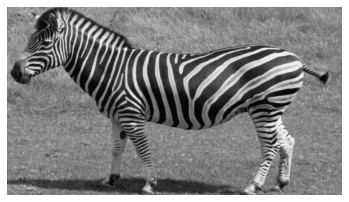

In [ ]:
plt.imshow(arr_4,cmap='gray')
plt.axis('off')

-Above image is gu obtained by unsampling g(which is obtained by downsampling :fu)

In [ ]:
arr.astype(int)
arr_2.astype(int)
arr_4.astype(int)
ui=arr-arr_2 #considering matrix difference to compare f and g visually.(PART-1)
uw=arr-arr_4 #considering matrix difference to compare f and g visually.(PART-2)

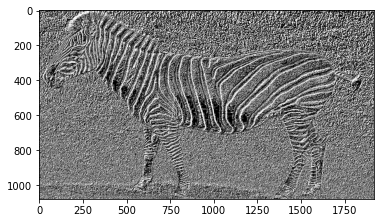

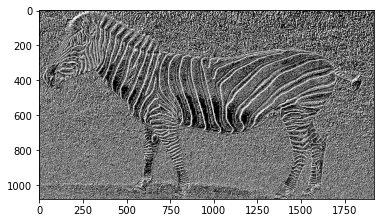

In [ ]:
plt.imshow(ui,cmap='gray')
plt.show()  #PART-1
plt.imshow(uw,cmap='gray') 
plt.show()  #PARt-2

Checking difference between above two images 

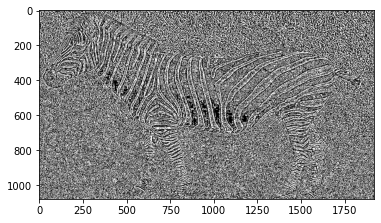

In [ ]:
D=ui-uw
plt.imshow(D,cmap='gray')
plt.show()

From visual inspection we can notice that there are differences between images:(f-gu) in both cases.

Defining a new index to see which image is closer:

In [ ]:
k=0
for i in ui:
  for j in i:
    k+=abs(j)
print(k/(1080*1920))

115.34359519675925


In [ ]:
k=0
for i in uw:
  for j in i:
    k+=abs(j)
print(k/(1080*1920))

108.94773726851852


We can see that in 2nd case we have  relatively less value, so it is visually closer to given image(f)